In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
# import subprocess #ベクター画像出力用
import math
import matplotlib.dates as mdates # DataTimeの横軸調整

In [2]:
# matplotlibの設定

plt.rcParams['font.size'] = 10
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.3

plt.rcParams["xtick.minor.visible"] = True # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = True # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 3.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 3.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.6     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.6     # y軸副目盛り線の線幅

plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'

In [3]:
def graph(data, param):
    num_data = data.shape[1]
    ylim_exist = param[0]
    ylim = param[1]
    title = param[2]
    xlabels = param[3]
    ylabels = param[4]
    interval = param[5]
    list000_exist = param[6]
    list000 = param[7]
    locator = param[8]

    fig, axes = plt.subplots(num_data, 1, figsize=(10, 10 * math.sqrt(2)), facecolor='w') # (行,列,サイズ・・・)
    fig.subplots_adjust(hspace=0) # 上下方向のグラフ間の空白を埋めてsubplotsを繋げる

    # y方向の表示範囲のリストを作る．上下1割の空白を作る．
    def make_ylim_list(data):
        ymax = np.array(data.max())
        ymin = np.array(data.min())
        ymax_ymin = np.abs(ymax - ymin)
        ymax_ymin_per10 = ymax_ymin * 0.1
        ymax += ymax_ymin_per10
        ymin -= ymax_ymin_per10
        return(ymax, ymin)
        
    if ylim_exist == 1:
        ymax, ymin = ylim[0], ylim[1]
    if ylim_exist == 0:
        ymax, ymin = make_ylim_list(data)

    for i in range(num_data): # 全グラフに適用
        axes[i].plot(data.index,data.iloc[:,i], c='black',linewidth=1) #  marker=\"o\", markersize=1.5
        axes[i].set_xlim(data.index.min(), data.index.max())
        axes[i].set_ylim(ymin[i], ymax[i])
        axes[i].set_ylabel(ylabels[i])
        if list000_exist == 1:
            for j in list000:
                axes[i].vlines(j, ymin[i], ymax[i], color="gray", linestyles="dashed", linewidth=0.5)

    for i in range(1, num_data, 2): # 偶数行のグラフにのみ適用
        axes[i].yaxis.set_label_position('right')
        axes[i].yaxis.set_ticks_position('right')
    
    for i in range(num_data - 1): # 最後尾のグラフにのみ適用
        axes[i].axes.xaxis.set_ticklabels([]) # 目盛りを右側に表示

    axes[0].set_title(title) # タイトル
    axes[num_data-1].set_xlabel(xlabels) # x軸ラベル

    # ax1.hlines(0,pd.Series(df.index).iloc[0],pd.Series(df.index).iloc[-1],color="black",linestyles="dashed",linewidth=1) # hlines(y, xmin, xmax)
    # # ax2.hlines(0,pd.Series(df.index).iloc[0],pd.Series(df.index).iloc[-1],color="black",linestyles="dashed",linewidth=1) # hlines(y, xmin, xmax)

    # ax1.fill_between(data1.index, data1.iloc[:], 0, where=0<data1.iloc[:], color="orange", alpha=0.5)
    # ax1.fill_between(data1.index, data1.iloc[:], 0, where=data1.iloc[:]<0, color="skyblue", alpha=0.5)

    # 軸目盛の設定
    axes[num_data-1].xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=interval, tz=None))
    axes[num_data-1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")) # 年月日：%Y-%m-%d　年月日時間 %Y-%m-%d\n%H:%M:%S
    
    # # 軸目盛ラベルの回転
    # labels = ax6.get_xticklabels()
    # plt.setp(labels, rotation=90, fontsize=10)

    dt_now = datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
    plt.savefig(f'graph/{title}_{dt_now}.png')
    plt.savefig(f'graph/{title}_{dt_now}.svg')
    # subprocess.call(f'inkscape graph/result_{start}-{end}.svg -M graph/result_{start}-{end}.emf', shell=True)

    plt.show()
    return(plt)

In [4]:
def graph_contour(data, param):
    locator = param[8]

    df_size = data.shape
    Z = np.zeros((df_size[0], df_size[1]))
    for i in range(15):
        Z[:,i] = data.iloc[:,i]
    Z = Z.T

    fig = plt.figure(figsize=(10,3), dpi=120, facecolor='w')
    ax1 = fig.add_subplot(1, 1, 1)
    c = ax1.contourf(data.index, y, Z, 100, cmap="jet")
    # ax1.contour(data.index, y, Z, 10)
    # ax1.invert_yaxis()
    fig.colorbar(c)
    # df.index, df["R1-1[C]"]

    ax1.set_title('Vertical temperature distribution of ice and water in the experimental pool')
    #ax1.set_xlabel('')
    ax1.set_ylabel('Depth (cm)')

    # 軸目盛の設定
    if locator == 1:
        ax1.xaxis.set_major_locator(mdates.DayLocator(bymonthday=None, interval=interval, tz=None))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")) # 年月日：%Y-%m-%d　年月日時間 %Y-%m-%d\n%H:%M:%S
        ax1.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    if locator == 2:
        ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=None, interval=interval, tz=None))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")) # 年月日：%Y-%m-%d　年月日時間 %Y-%m-%d\n%H:%M:%S
    if locator == 3:
        ax1.xaxis.set_major_locator(mdates.MinuteLocator(bymonthday=None, interval=interval, tz=None))
        ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")) # 年月日：%Y-%m-%d　年月日時間 %Y-%m-%d\n%H:%M:%S

    dt_now = datetime.datetime.now().strftime('%Y-%m-%d_%H%M%S')
    plt.savefig(f'graph/Vertical temperature distribution_{dt_now}.png')
    plt.savefig(f'graph/Vertical temperature distribution_{dt_now}.svg')
    plt.show()

In [5]:
df = pd.read_csv('output/temp.csv', header=0)
df = df.set_index("Time")
df.index = pd.to_datetime(df.index)

# センサーの高さを入力する
y = np.array((4,2,0,-2,-4,-6,-8,-10,-12,-14,-16,-21,-26,-36,-46))

y軸の表示範囲
最大値：[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
最小値：[-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10]


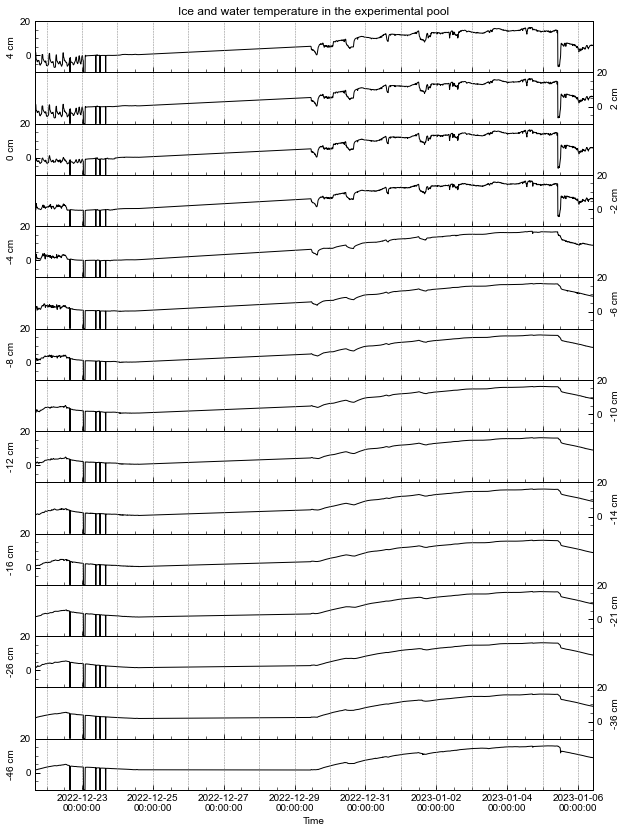

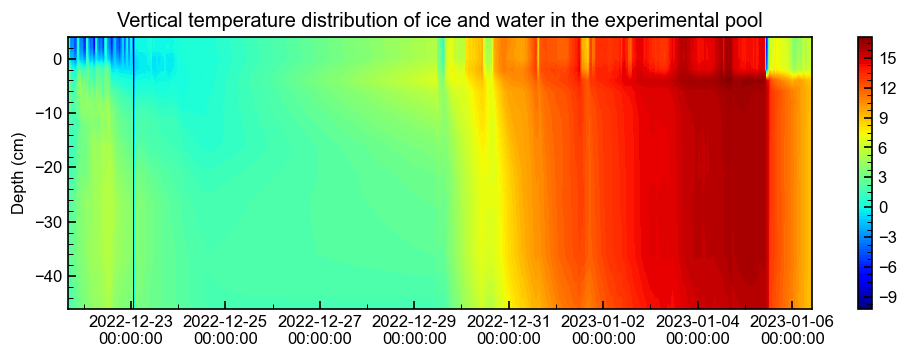

In [6]:
starttime = datetime.datetime(2022,12,21,16,0,0) # 表示したい期間の開始日時
endtime = datetime.datetime(2023,1,6,10,0,0) # 表示したい期間の終了日時
data = df[(df.index >= starttime) & (df.index <=endtime)]

ylabels = ["4 cm","2 cm","0 cm","-2 cm","-4 cm","-6 cm","-8 cm","-10 cm","-12 cm","-14 cm","-16 cm","-21 cm","-26 cm","-36 cm","-46 cm"]
xlabels = "Time"
interval = 2
ymax = [20] * data.shape[1] # y軸の表示範囲の最大値をリストで指定する
ymin = [-10] * data.shape[1] # y軸の表示範囲の最小値をリストで指定する
ylim = [ymax, ymin] # 
ylim_exist = 1
title = "Ice and water temperature in the experimental pool" # グラフのタイトル
list000 = df[df.index.time == datetime.time(0,0,0)].index # 0時0分0秒のdatetimeのリスト
list000_exist = 1
locator = 1

param = [ylim_exist, ylim, title, xlabels, ylabels, interval , list000_exist, list000, locator] # [yの範囲を指定するときは1，しないときは0] 

print("y軸の表示範囲")
print("最大値：" + str(ymax))
print("最小値：" + str(ymin))

graph(data, param)
graph_contour(data, param)